# Project Description

Give a brief description about your project

# Data Provided for This Project

- Shooting and Firearm Discharges Open Data

    **Source:**  https://data.torontopolice.on.ca/datasets/TorontoPS::shooting-and-firearm-discharges-open-data/explore
    
    
## Data Field Descriptions
| Field |    Fild Name    | Description                                                                          |
| ----- | --------------- |--------------------------------------------------------------------------------------|
| 1     | EVENT_UNIQUE_ID | Offence Number                                                                       |
| 2     | OCC_DATE        | Date Offence Occurred (time is displayed in UTC format when downloaded as a CSV)     |
| 3     | OCC_YEAR        | Year Offence Occurred                                                                |
| 4     | OCC_MONTH       | Month Offence Occurred                                                               |
| 5     | OCC_DOW         | Day of the Week Offence Occurred                                                     |
| 6     | OCC_DOY         | Day of the Year Offence Occurred                                                     |
| 7     | OCC_DAY         | Day of the Month Offence Occurred                                                    |
| 8     | OCC_HOUR        | Hour Offence Occurred                                                                |
| 10    | DIVISION        | Police Division where Offence Occurred                                               |
| 11    | DEATH           | Count of Deaths caused by the Shooting                                               |
| 12    | INJURIES        | Count of Injured Persons caused by the Shooting                                      |
| 13    | HOOD_158        | Identifier of Neighbourhood using City of Toronto's new 158 neighbourhood structure  |
| 14    | NEIGHBOURHOOD_158 | Name of Neighbourhood using City of Toronto's new 158 neighbourhood structure      |
| 15    | HOOD_140        | Identifier of Neighbourhood using City of Toronto's old 140 neighbourhood structure  |
| 16    | NEIGHBOURHOOD_140 | Name of Neighbourhood using City of Toronto's old 140 neighbourhood structure      |
| 17    | LONG_WGS84      | Longitude Coordinates (Offset to nearest intersection)                               |
| 18    | LAT_WGS84       | Latitude Coordinates (Offset to nearest intersection)                                |


## Shooting Definition

**Shooting Event/Occurrence**: Any incident in which a projectile is discharged from a firearm (as defined under the Criminal Code of Canada) and injures a person. This excludes events such as suicide and police involved firearm discharges.

**Firearm Discharge**: Any incident where evidence exists that a projectile was discharged from a firearm (as defined under the Criminal Code of Canada) including accidental discharge (non-police), celebratory fire, drive-by etc.

**Persons Injured** (previously classified as “victims”): A person who was struck by a bullet(s) as a result of the discharge of a firearm (as defined under the Criminal Code of Canada). This excludes events such as suicide, police-involved event or where the weapon used was not a real firearm (such as pellet gun, air pistol, “sim-munition” etc.)

Injury Levels

**Death**: Where the injured person (as defined above) has died as a result of injuries sustained from a bullet(s).

**Injuries**: Where the injured person (as defined above) has non-fatal physical injuries as a result of a bullet(s).


## Official Data Analysis
https://data.torontopolice.on.ca/pages/shootings

# Part-1: Data Analysis for Provided Data

## Extra Data to help the analysis
Data can be downloaded from this link: https://open.toronto.ca/dataset/neighbourhoods/
- TPS_Police_Divisions.shp
- Neighbourhoods-4326.shp

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import descartes
import geopandas as gpd

In [2]:
data = r"D:\4.MMAI5000 Artificial Intelligence Fundamentals\project_code\Shooting_and_Firearm_Discharges_Open_Data.csv"
df = pd.read_csv(data)

In [3]:
df.columns.values

array(['X', 'Y', 'OBJECTID', 'EVENT_UNIQUE_ID', 'OCC_DATE', 'OCC_YEAR',
       'OCC_MONTH', 'OCC_DOW', 'OCC_DOY', 'OCC_DAY', 'OCC_HOUR',
       'OCC_TIME_RANGE', 'DIVISION', 'DEATH', 'INJURIES', 'HOOD_158',
       'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84',
       'LAT_WGS84'], dtype=object)

In [4]:
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075


In [5]:
df['DIVISION'].unique()

array(['D41', 'D23', 'D31', 'D51', 'D42', 'D33', 'D14', 'D12', 'D54',
       'D52', 'D55', 'D32', 'D43', 'D13', 'D22', 'D11', 'D53'],
      dtype=object)

In [6]:
case_by_division = df.loc[:, ['DIVISION', 'OCC_YEAR', 'DEATH', 'INJURIES']]
case_by_division = case_by_division.groupby(['DIVISION','OCC_YEAR'])[['INJURIES', 'DEATH']].sum().reset_index()
case_by_division = case_by_division.sort_values(by=['DIVISION', 'OCC_YEAR'])

case_by_division

,DIVISION,OCC_YEAR,INJURIES,DEATH
0,D11,2004,0,0
1,D11,2005,1,2
2,D11,2006,3,0
3,D11,2007,0,1
4,D11,2008,0,0
...,...,...,...,...
318,D55,2018,2,0
319,D55,2019,6,0
320,D55,2020,3,0
321,D55,2021,3,1


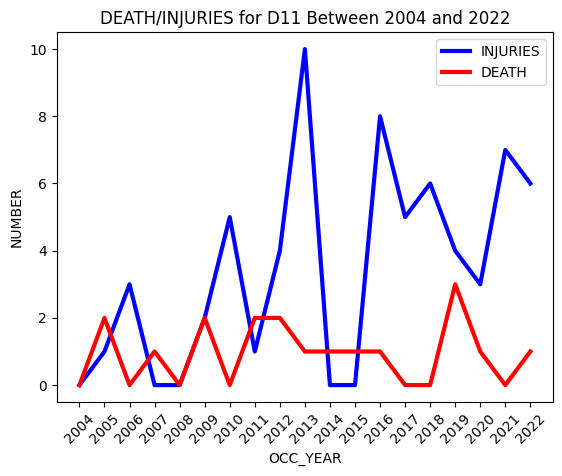

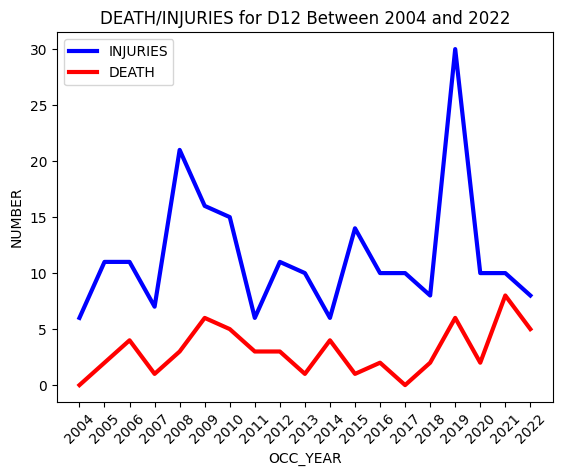

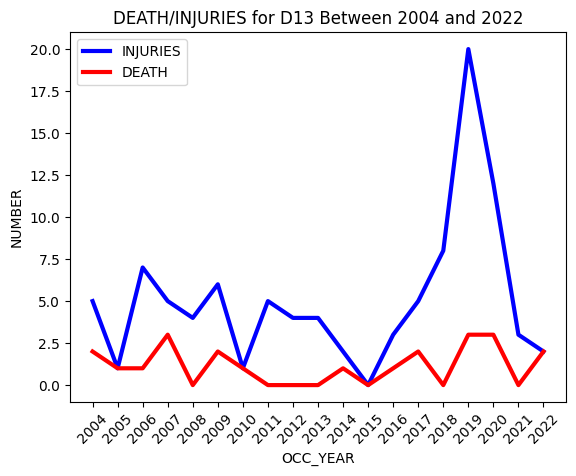

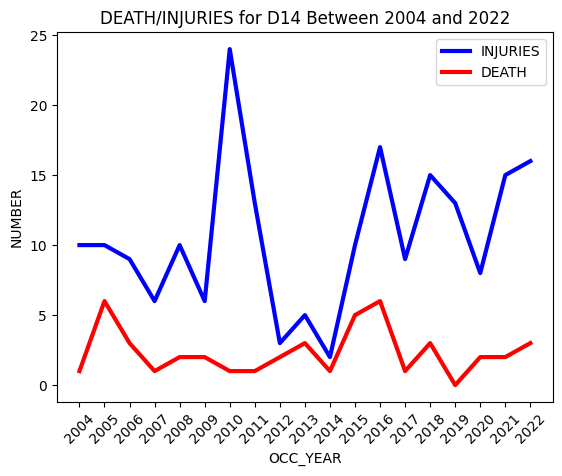

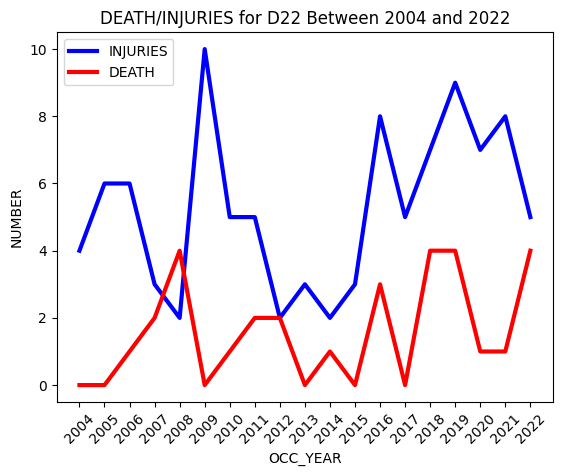

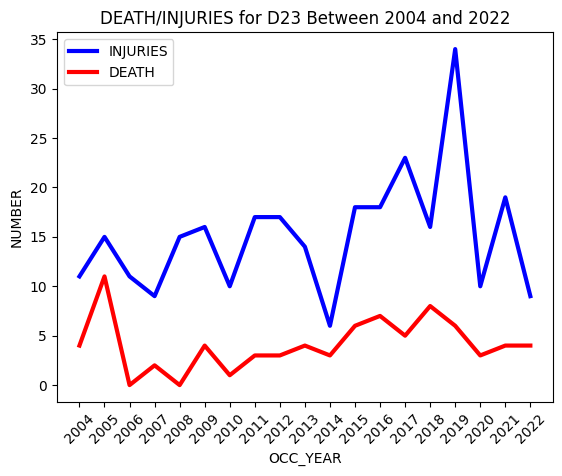

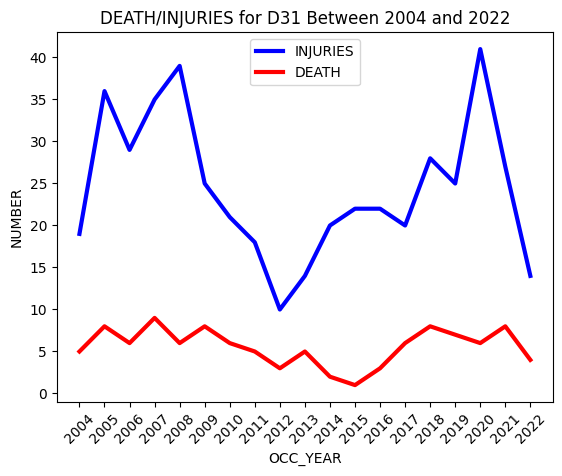

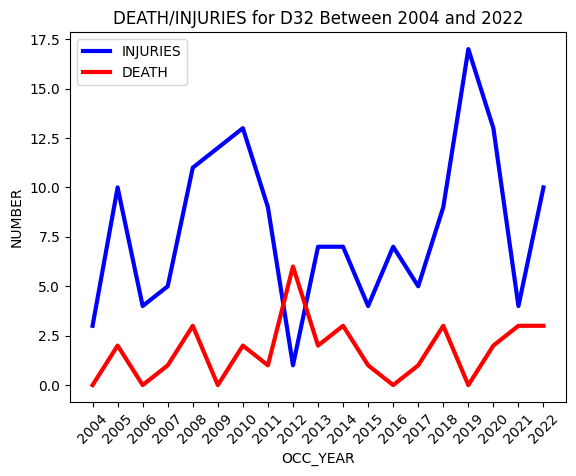

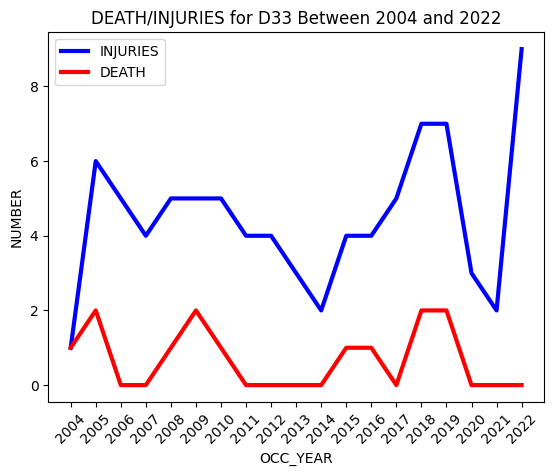

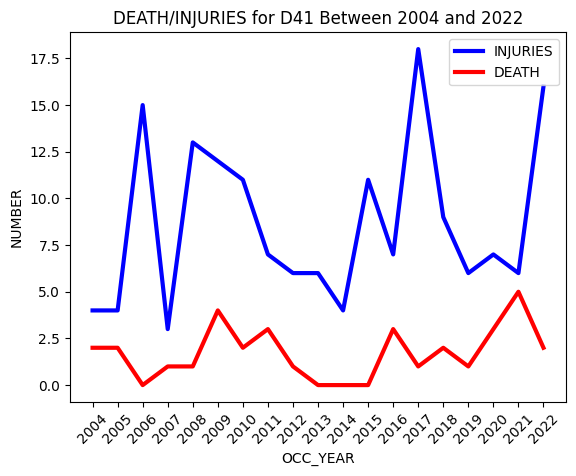

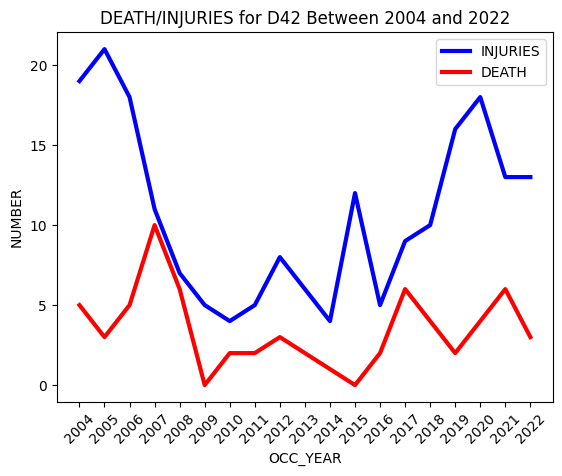

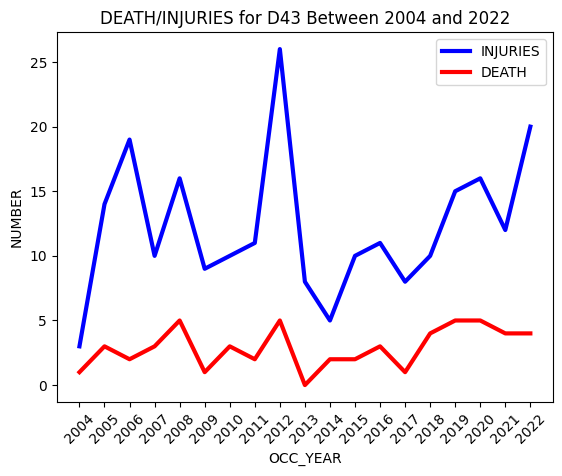

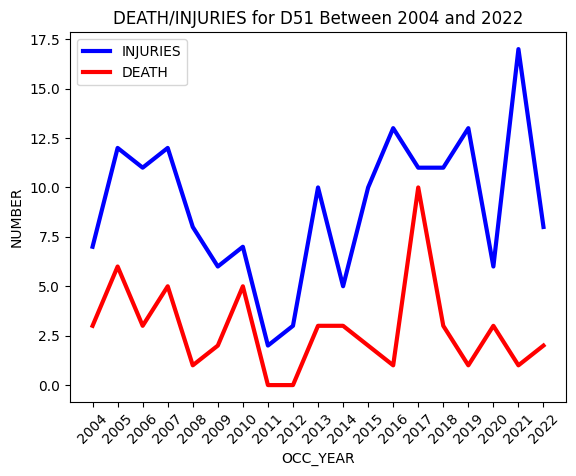

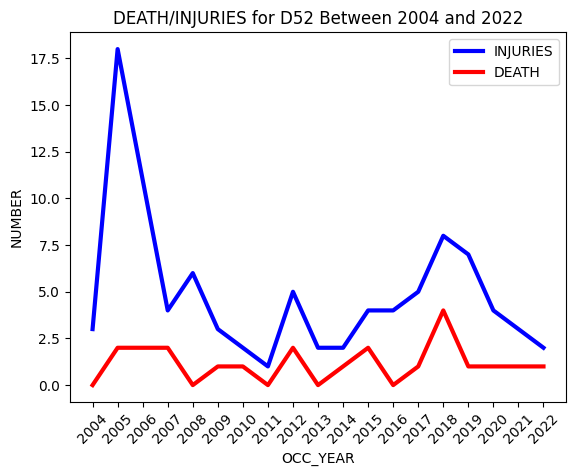

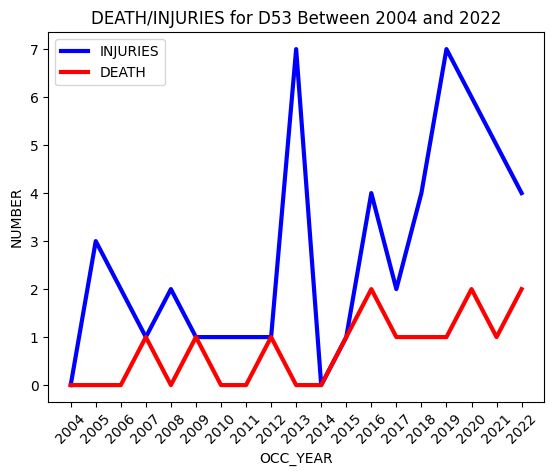

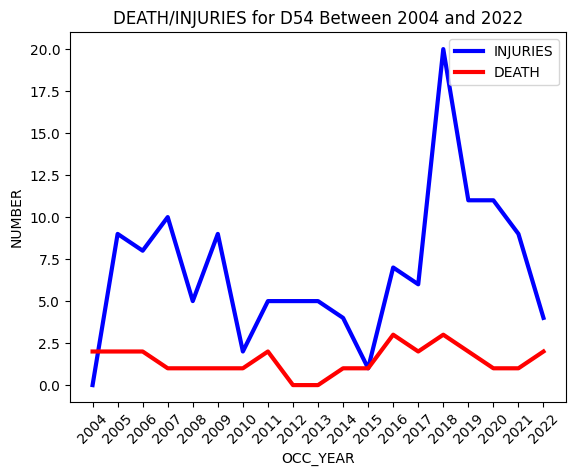

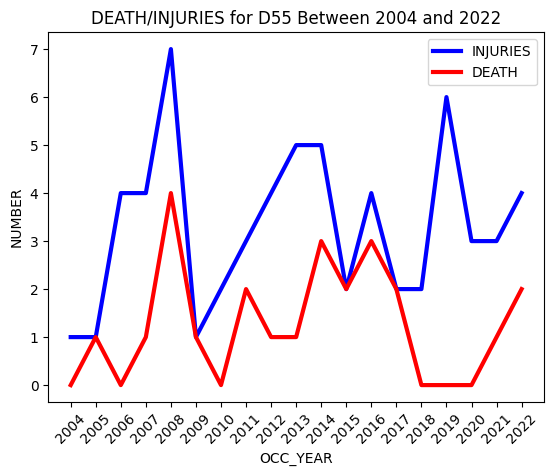

In [7]:
divisions = case_by_division.DIVISION.unique()
years = case_by_division.OCC_YEAR.unique()

division_injury = {}
division_death = {}

for division in divisions:
    division_injury[division] = []
    division_death[division] = []
    for year in years:
        injury_num = case_by_division.loc[(case_by_division['DIVISION'] == division) & (case_by_division['OCC_YEAR'] == year), 'INJURIES'].values[0]
        death_num = case_by_division.loc[(case_by_division['DIVISION'] == division) & (case_by_division['OCC_YEAR'] == year), 'DEATH'].values[0]
        division_injury[division].append(int(injury_num))
        division_death[division].append(death_num)

years = [str(year) for year in years]
for idx, key in enumerate(division_injury.keys()):
    injuries = division_injury[key]
    death = division_death[key]
    
    # Set the x axis label of the current axis.
    plt.xlabel('OCC_YEAR')
    plt.xticks(rotation=45)
    # Set the y axis label of the current axis.
    plt.ylabel('NUMBER')
    # Set a title 
    plt.title('DEATH/INJURIES for {} Between {} and {}'.format(key, years[0], years[-1]))
    # Display the figure.
    plt.plot(years, injuries, color='blue', linewidth = 3,  label = 'INJURIES')
    plt.plot(years, death, color='red', linewidth = 3,  label = 'DEATH')
    # show a legend on the plot
    plt.legend()
    plt.show()

### Load shape files

In [5]:
tps_division_map = gpd.read_file('./TPS_Police_Divisions/TPS_Police_Divisions.shp')
toronto_neighbourhood_map = gpd.read_file('./Neighbourhoods/Neighbourhoods-4326.shp')

### Data Privacy
According to the privacy protected within the PSDP, it claims:
"Prior to the release of any dataset, the data goes through a privacy assessment to ensure that any personal identifiers/confidential information is removed from the dataset. Additionally, all geospatial information in masked to the nearest intersection node so that no point will be attributable to a residence."

Therefore, we need to prepare to check the modified data.

### Modified coordinates found

In [6]:
coordinates = df.loc[:, ['DIVISION', 'DEATH', 'INJURIES', 'LONG_WGS84', 'LAT_WGS84']]
coordinates.head()
if (coordinates['LAT_WGS84'] == 0).any():
    print('Value 0 found in cooridantes')

Value 0 found in cooridantes


In [7]:
modified_cors = coordinates.loc[coordinates['LAT_WGS84'] == 0]
modified_cors

,DIVISION,DEATH,INJURIES,LONG_WGS84,LAT_WGS84
9,D31,1,0,-85.488744,0.0
22,D51,0,1,-85.488744,0.0
27,D14,0,0,-85.488744,0.0
78,D54,0,0,-85.488744,0.0
112,D14,0,1,-85.488744,0.0
...,...,...,...,...,...
2184,D14,1,1,-85.488744,0.0
2223,D12,0,1,-85.488744,0.0
2250,D51,0,1,-85.488744,0.0
2258,D42,0,1,-85.488744,0.0


In [8]:
effective_cors = coordinates.loc[coordinates['LAT_WGS84'] != 0]

### Convert coordinates to geo data

In [9]:
from shapely.geometry import Point, Polygon

geometry = [Point(xy) for xy in zip(effective_cors['LONG_WGS84'], effective_cors['LAT_WGS84'])]

In [10]:
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(effective_cors, crs=crs, geometry=geometry)
geo_df.head()

/Users/guojun/proDev/anaconda3/envs/geopandas_env/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,DIVISION,DEATH,INJURIES,LONG_WGS84,LAT_WGS84,geometry
0,D41,0,0,-79.234955,43.781528,POINT (-79.23496 43.78153)
1,D23,0,0,-79.618218,43.733547,POINT (-79.61822 43.73355)
2,D31,1,1,-79.518759,43.769157,POINT (-79.51876 43.76916)
3,D51,1,0,-79.378870,43.660665,POINT (-79.37887 43.66066)
4,D42,0,0,-79.212435,43.812075,POINT (-79.21244 43.81208)


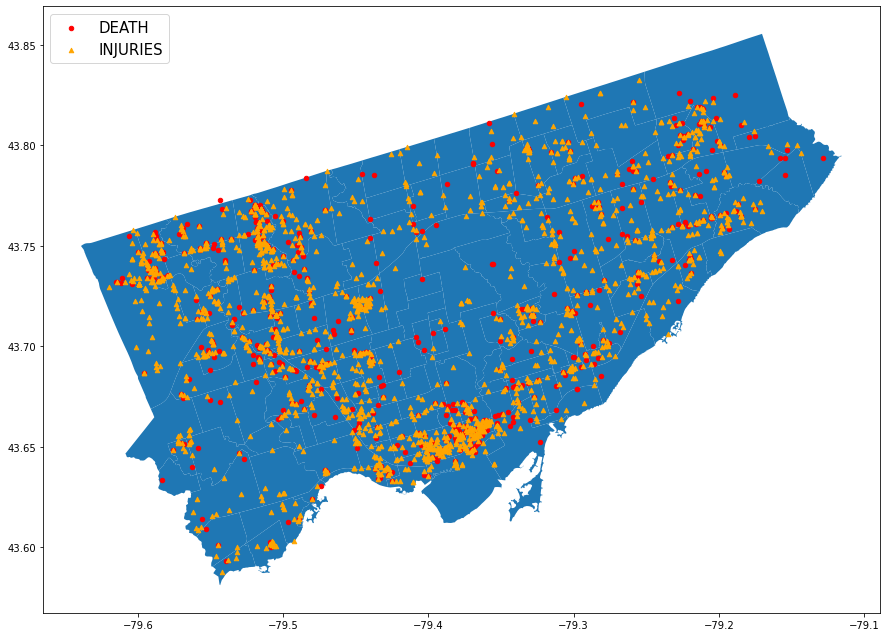

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
toronto_neighbourhood_map.plot(ax=ax)
geo_df[geo_df['DEATH'] == 1].plot(ax=ax, 
                                       markersize=20, 
                                       color='red', 
                                       marker='o', 
                                       label='DEATH')
geo_df[geo_df['INJURIES'] == 1].plot(ax=ax, 
                                       markersize=20, 
                                       color='orange', 
                                       marker='^', 
                                       label='INJURIES')
plt.legend(prop={'size':15}, loc='upper left')

### Check neighborhood

In [12]:
case_by_neighborhoods = df.loc[:, ['DEATH', 'INJURIES', 'NEIGHBOURHOOD_158']]
case_by_neighborhoods.head()

,DEATH,INJURIES,NEIGHBOURHOOD_158
0,0,0,Woburn North
1,0,0,West Humber-Clairville
2,1,1,Black Creek
3,1,0,Downtown Yonge East
4,0,0,Malvern East


In [13]:
# Reorgnized data
case_by_neighborhoods = case_by_neighborhoods.groupby(by="NEIGHBOURHOOD_158")["DEATH","INJURIES"].sum()
case_by_neighborhoods

/var/folders/xj/xxjr_bv52wxd26v9l5j2_9yw0000gn/T/ipykernel_47833/2625321989.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  case_by_neighborhoods = case_by_neighborhoods.groupby(by="NEIGHBOURHOOD_158")["DEATH","INJURIES"].sum()


,DEATH,INJURIES
NEIGHBOURHOOD_158,,
Agincourt North,0,3
Agincourt South-Malvern West,7,23
Alderwood,7,3
Annex,2,17
Avondale,2,1
...,...,...
Yonge-Doris,0,5
Yonge-Eglinton,3,0
Yonge-St.Clair,0,2


In [14]:
neighbor_based_map = toronto_neighbourhood_map.set_index('AREA_NA7').join(case_by_neighborhoods)
neighbor_based_map = neighbor_based_map.reset_index()
neighbor_based_map = neighbor_based_map.fillna(0)
neighbor_based_map.sample(5)

,AREA_NA7,_id1,AREA_ID2,AREA_AT3,PARENT_4,AREA_SH5,AREA_LO6,AREA_DE8,CLASSIF9,CLASSIF10,OBJECTI11,geometry,DEATH,INJURIES
35,Cliffcrest,36,2502331,26022846,0,123,123,Cliffcrest (123),Not an NIA or Emerging Neighbourhood,NA,17825297.0,"POLYGON ((-79.21776 43.72785, -79.21764 43.727...",1,22
77,Keelesdale-Eglinton West,78,2502289,26022804,0,110,110,Keelesdale-Eglinton West (110),Neighbourhood Improvement Area,NIA,17825969.0,"POLYGON ((-79.46210 43.68572, -79.46202 43.685...",4,13
0,South Eglinton-Davisville,1,2502366,26022881,0,174,174,South Eglinton-Davisville (174),Not an NIA or Emerging Neighbourhood,NA,17824737.0,"POLYGON ((-79.38635 43.69783, -79.38623 43.697...",1,1
134,Bayview Woods-Steeles,135,2502232,26022747,0,049,049,Bayview Woods-Steeles (49),Not an NIA or Emerging Neighbourhood,NA,17826881.0,"POLYGON ((-79.36825 43.79091, -79.36807 43.790...",2,5
45,Mimico-Queensway,46,2502321,26022836,0,160,160,Mimico-Queensway (160),Not an NIA or Emerging Neighbourhood,NA,17825457.0,"POLYGON ((-79.48696 43.62389, -79.48689 43.623...",1,8


## Heat Map of Death Cases in Shooting/Gunfire by Neighborhood

/var/folders/xj/xxjr_bv52wxd26v9l5j2_9yw0000gn/T/ipykernel_47833/1480974258.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


<Axes: title={'center': 'Heat Map of Death Cases in Shooting/Gunfire by Neighbourhood in Toronto'}>

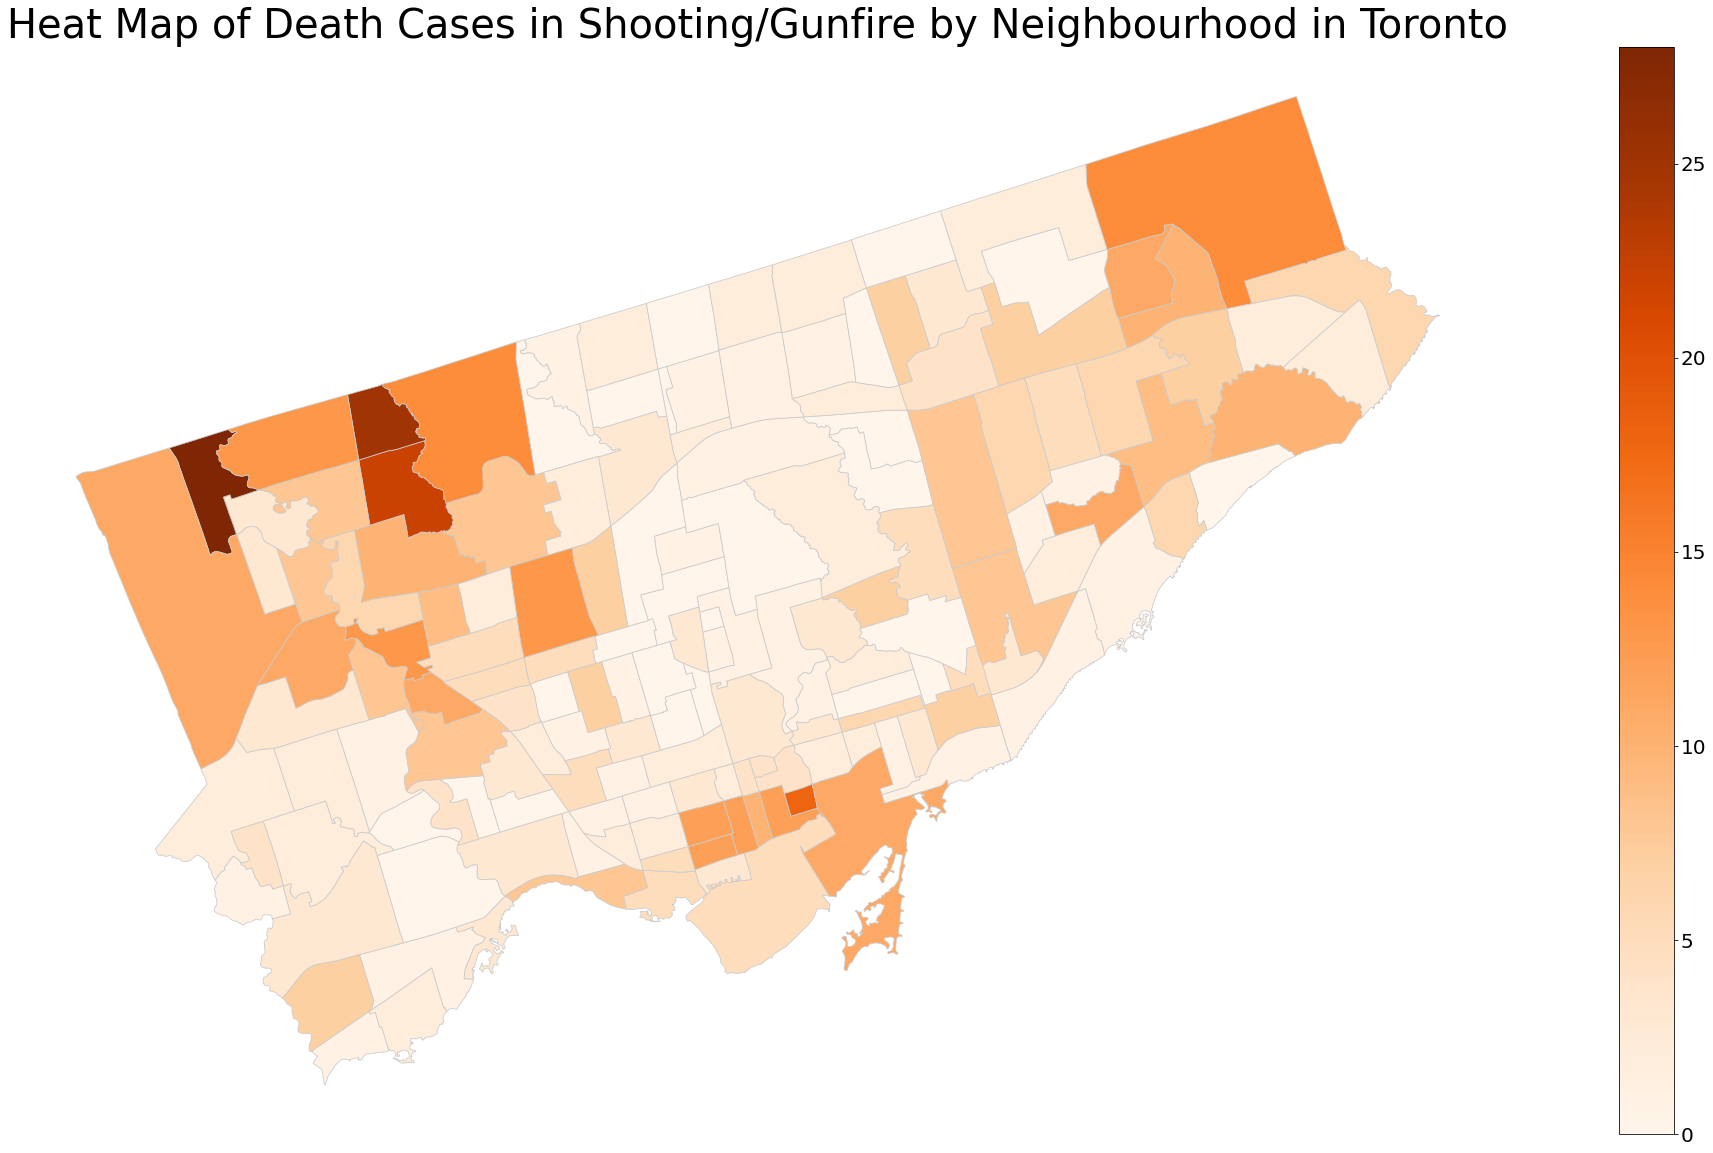

In [15]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Death Cases in Shooting/Gunfire by Neighbourhood in Toronto', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = neighbor_based_map['DEATH'].min(), neighbor_based_map['DEATH'].max()
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

neighbor_based_map.plot('DEATH', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

## Heat Map of Injuries in Shooting/Gunfire by Neighborhood

/var/folders/xj/xxjr_bv52wxd26v9l5j2_9yw0000gn/T/ipykernel_47833/1566921878.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


<Axes: title={'center': 'Heat Map of Injuries in Shooting/Gunfire by Neighbourhood in Toronto'}>

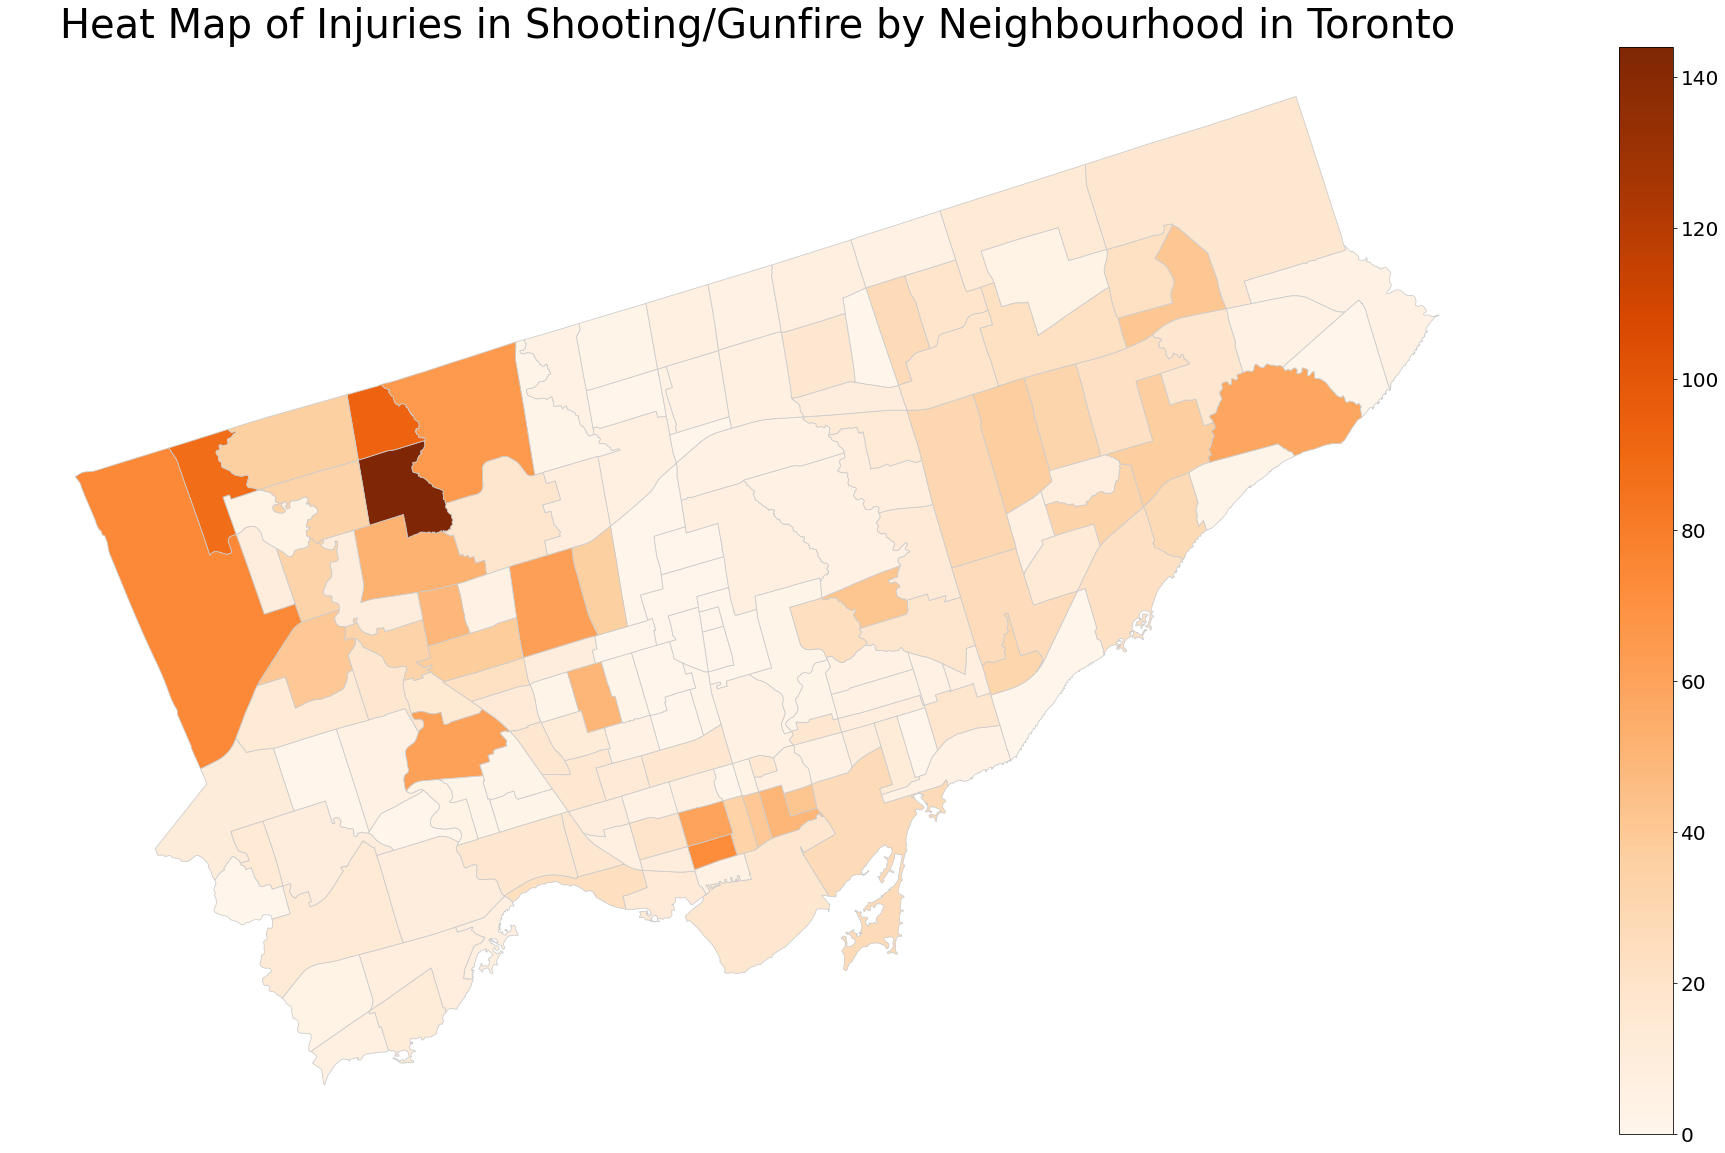

In [16]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Injuries in Shooting/Gunfire by Neighbourhood in Toronto', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = neighbor_based_map['INJURIES'].min(), neighbor_based_map['INJURIES'].max()
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

neighbor_based_map.plot('INJURIES', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

## Check Division

In [17]:
case_by_divisions = df.loc[:, ['DEATH', 'INJURIES', 'DIVISION']]
case_by_divisions.head()

,DEATH,INJURIES,DIVISION
0,0,0,D41
1,0,0,D23
2,1,1,D31
3,1,0,D51
4,0,0,D42


In [18]:
# Reorgnized data
case_by_divisions = case_by_divisions.groupby(by="DIVISION")["DEATH","INJURIES"].sum()
case_by_divisions

/var/folders/xj/xxjr_bv52wxd26v9l5j2_9yw0000gn/T/ipykernel_47833/2579399278.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  case_by_divisions = case_by_divisions.groupby(by="DIVISION")["DEATH","INJURIES"].sum()


,DEATH,INJURIES
DIVISION,,
D11,18,65
D12,58,220
D13,22,97
D14,45,201
D22,30,100
D23,78,288
D31,106,465
D32,33,151
D33,13,85


In [19]:
division_based_map = tps_division_map.set_index('DIV').join(case_by_divisions)
division_based_map = division_based_map.reset_index()
division_based_map = division_based_map.fillna(0)
division_based_map.sample(5)

,DIV,OBJECTID,AGENCY,UNIT_NAME,ADDRESS,CITY,AREA_SQKM,Shape__Are,Shape__Len,geometry,DEATH,INJURIES
7,D32,8,Toronto Police Service,32 Division,30 Ellerslie Av,Toronto,61.060480,1.170792e+08,43658.497245,"POLYGON ((-8836703.447 5423792.157, -8836752.9...",33,151
2,D13,3,Toronto Police Service,13 Division,1435 Eglinton Av W,Toronto,18.601911,3.559172e+07,24616.579174,"POLYGON ((-8841619.070 5419306.122, -8841613.4...",22,97
6,D31,7,Toronto Police Service,31 Division,40 Norfinch Dr,Toronto,42.667494,8.178915e+07,44477.146557,"POLYGON ((-8848170.047 5432061.361, -8847845.7...",106,465
5,D23,6,Toronto Police Service,23 Division,5230 Finch Av W,Toronto,57.642280,1.103691e+08,54270.053606,"POLYGON ((-8858683.348 5428697.823, -8858653.9...",78,288
8,D33,9,Toronto Police Service,33 Division,50 Upjohn Rd,Toronto,52.788882,1.012443e+08,45148.848738,"POLYGON ((-8828192.529 5423814.211, -8828137.7...",13,85


## Heat Map of Death Cases in Shooting/Gunfire by Division

/var/folders/xj/xxjr_bv52wxd26v9l5j2_9yw0000gn/T/ipykernel_47833/2231684609.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


<Axes: title={'center': 'Heat Map of Death Cases in Shooting/Gunfire by Division in Toronto'}>

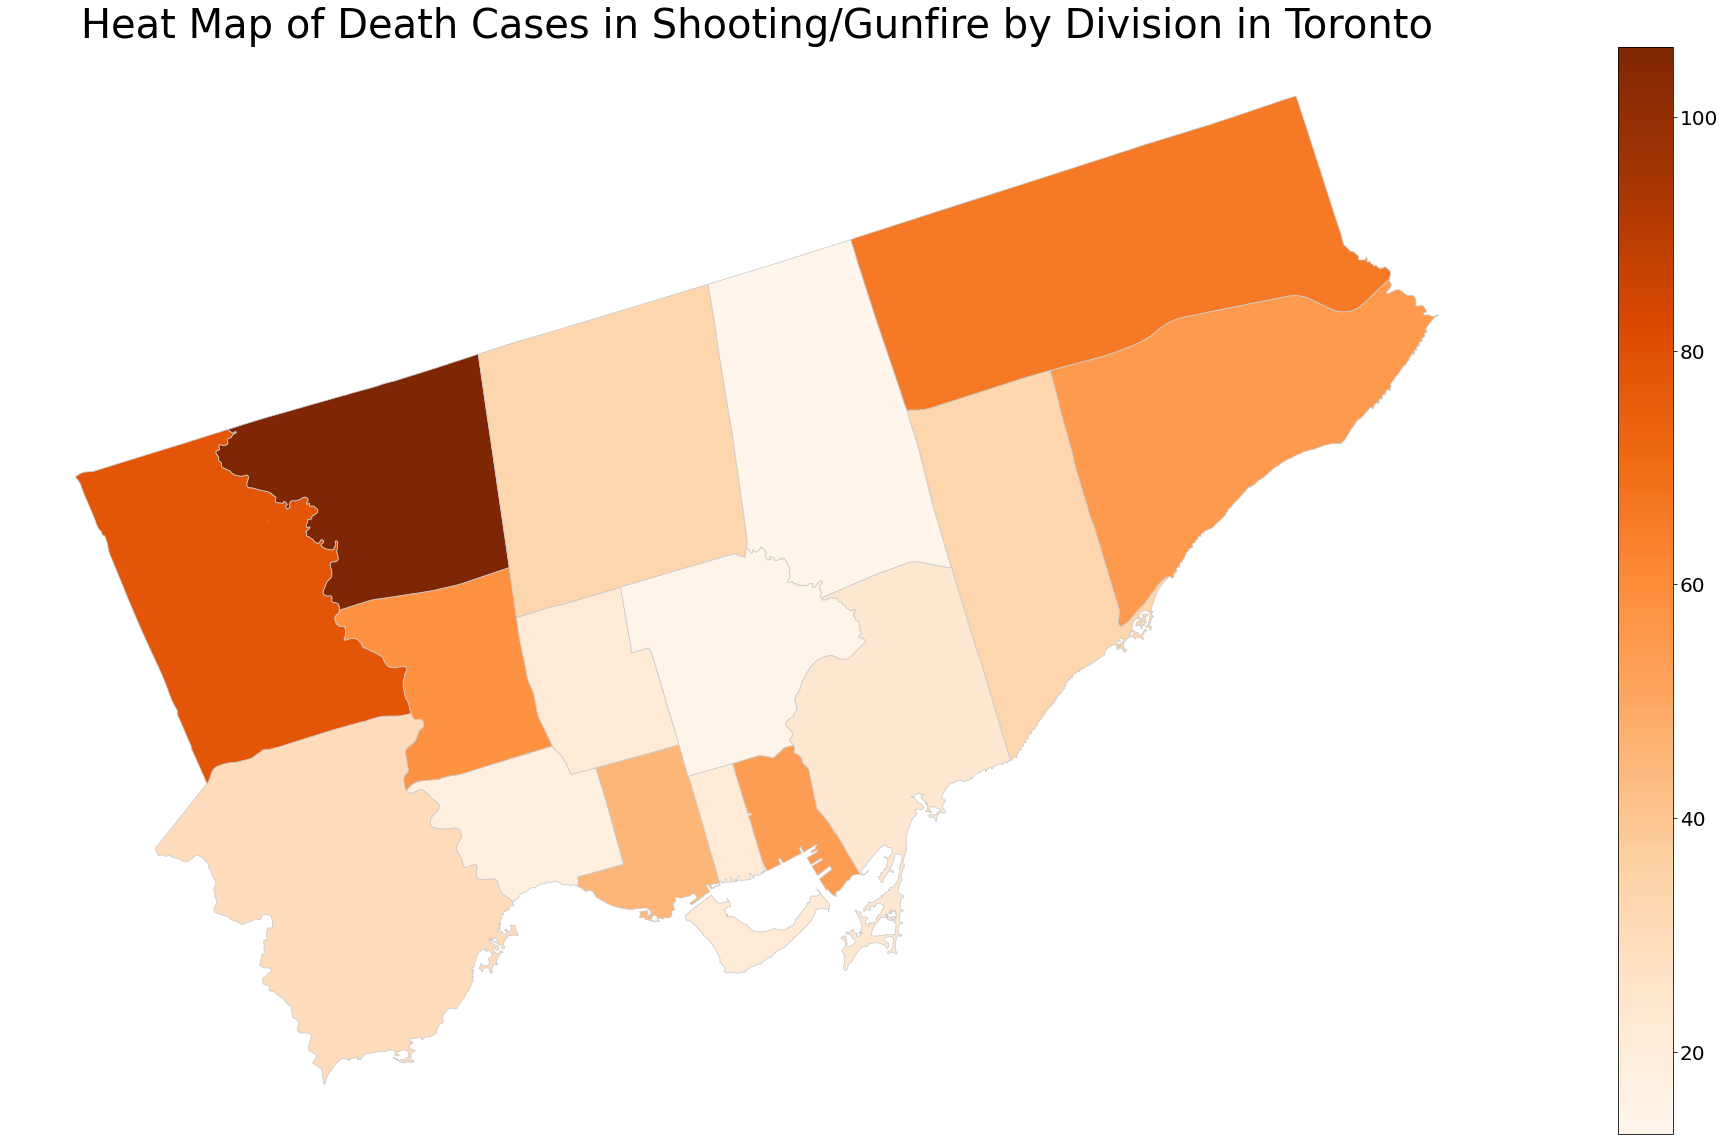

In [20]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Death Cases in Shooting/Gunfire by Division in Toronto', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = division_based_map['DEATH'].min(), division_based_map['DEATH'].max()
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

division_based_map.plot('DEATH', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

## Heat Map of Injuries in Shooting/Gunfire by Division

/var/folders/xj/xxjr_bv52wxd26v9l5j2_9yw0000gn/T/ipykernel_47833/927449950.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


<Axes: title={'center': 'Heat Map of Injuries in Shooting/Gunfire by Division in Toronto'}>

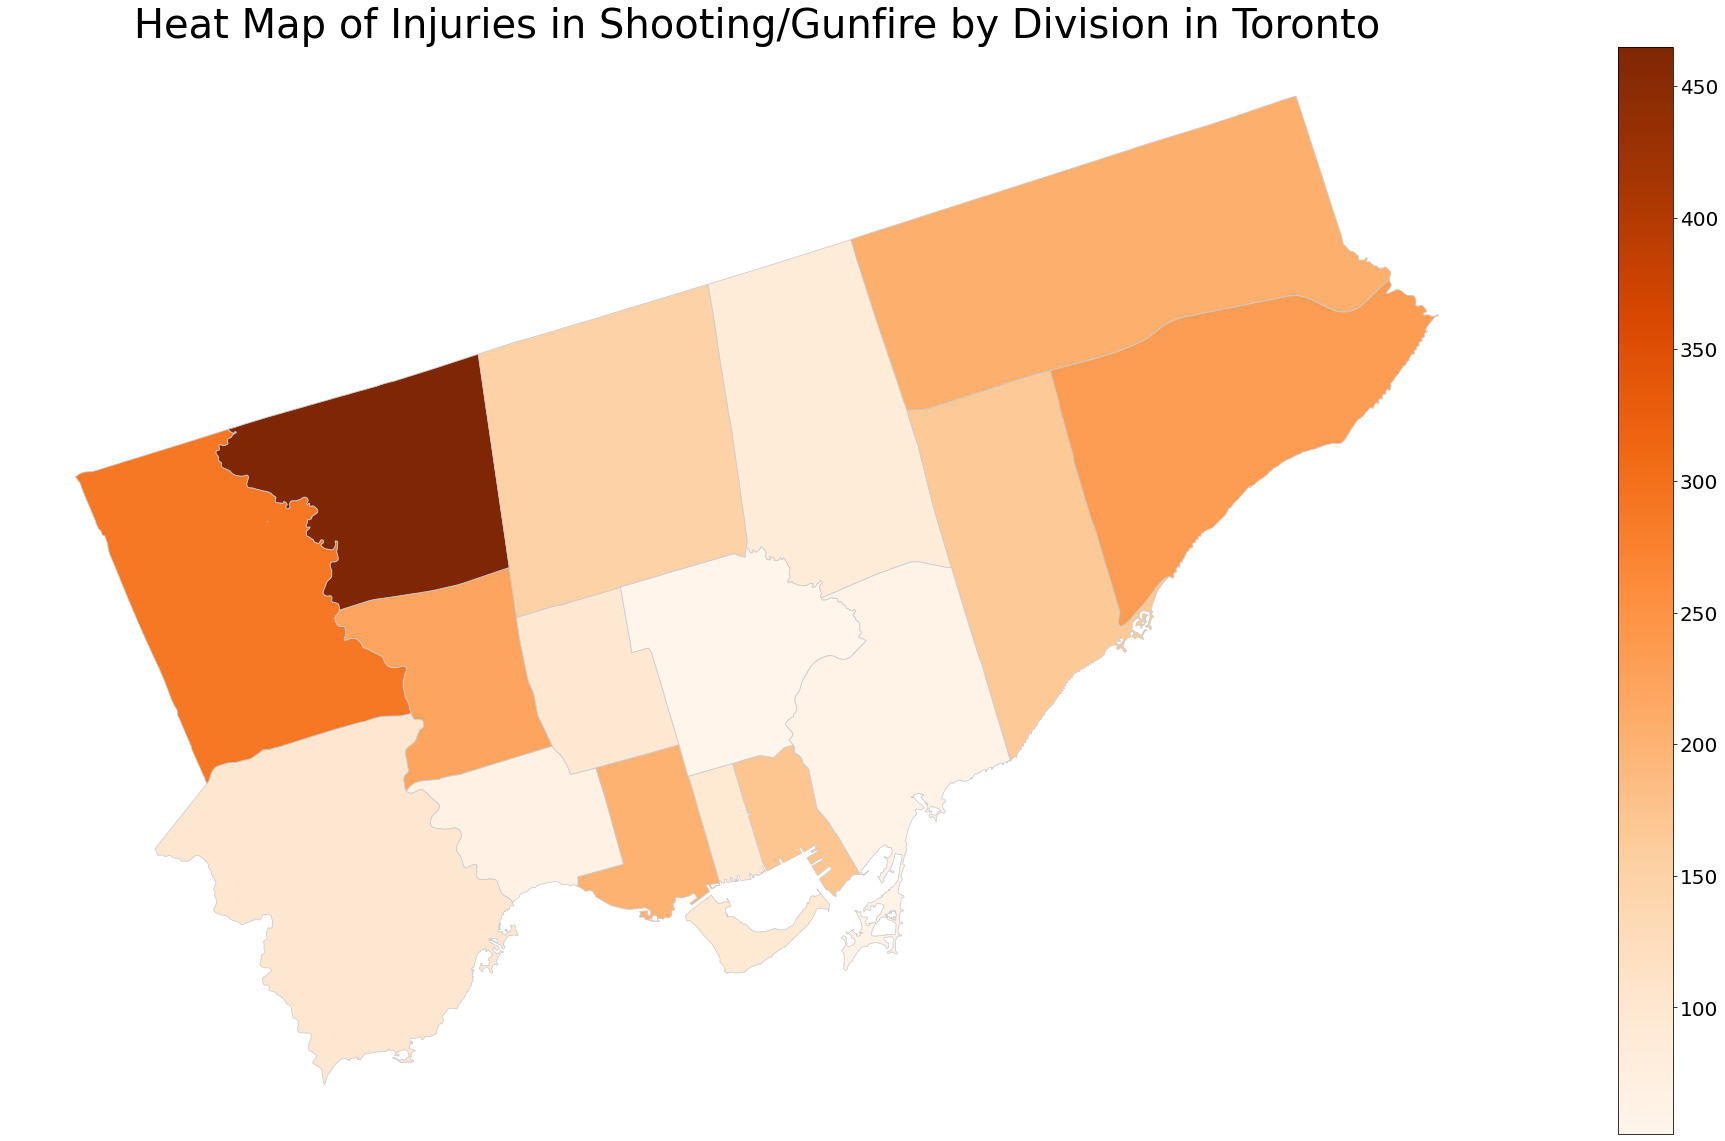

In [21]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Injuries in Shooting/Gunfire by Division in Toronto', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = division_based_map['INJURIES'].min(), division_based_map['INJURIES'].max()
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

division_based_map.plot('INJURIES', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

### Check Cases by Month

The following analysis shows shooting cases are usually higher in certain months of the year.

In [22]:
case_by_month = df.loc[:, ['OCC_MONTH', 'DEATH', 'INJURIES']]

# Reorgnized data
case_by_month = case_by_month.groupby(by="OCC_MONTH")["DEATH","INJURIES"].sum()
case_by_month.reset_index(inplace=True)
case_by_month = case_by_month.sort_values('OCC_MONTH', key = lambda x : pd.to_datetime(x, format='%B').dt.month)
case_by_month

/var/folders/xj/xxjr_bv52wxd26v9l5j2_9yw0000gn/T/ipykernel_47833/4261870128.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  case_by_month = case_by_month.groupby(by="OCC_MONTH")["DEATH","INJURIES"].sum()


,OCC_MONTH,DEATH,INJURIES
4,January,62,226
3,February,59,146
7,March,44,178
0,April,37,222
8,May,54,226
6,June,50,244
5,July,79,334
1,August,64,303
11,September,72,256
10,October,80,251


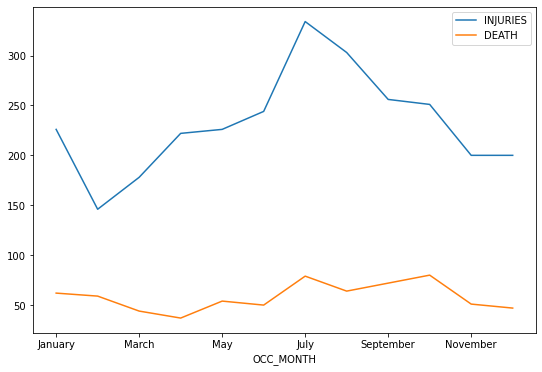

In [23]:
ax = case_by_month.plot(x='OCC_MONTH', y=['INJURIES', 'DEATH'], figsize=(9,6))

### Sorting Data based on Year and Month

In [24]:
case_by_month_2 = df.loc[:, ['OCC_YEAR', 'OCC_MONTH', 'DEATH', 'INJURIES']]
case_by_month_2 = case_by_month_2.groupby(['OCC_YEAR', 'OCC_MONTH'])['DEATH', 'INJURIES'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
case_by_month_2['OCC_MONTH'] = pd.Categorical(case_by_month_2['OCC_MONTH'], categories=month_order, ordered=True)
case_by_month_2 = case_by_month_2.sort_values(by=['OCC_YEAR', 'OCC_MONTH'])
case_by_month_2

/var/folders/xj/xxjr_bv52wxd26v9l5j2_9yw0000gn/T/ipykernel_47833/389454813.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  case_by_month_2 = case_by_month_2.groupby(['OCC_YEAR', 'OCC_MONTH'])['DEATH', 'INJURIES'].sum().reset_index()


,OCC_YEAR,OCC_MONTH,DEATH,INJURIES
4,2004,January,4,8
3,2004,February,1,1
7,2004,March,3,10
0,2004,April,1,11
8,2004,May,5,9
...,...,...,...,...
217,2022,August,2,11
227,2022,September,3,21
226,2022,October,6,13
225,2022,November,3,10


### Check Case Changes in the Last 5 Years

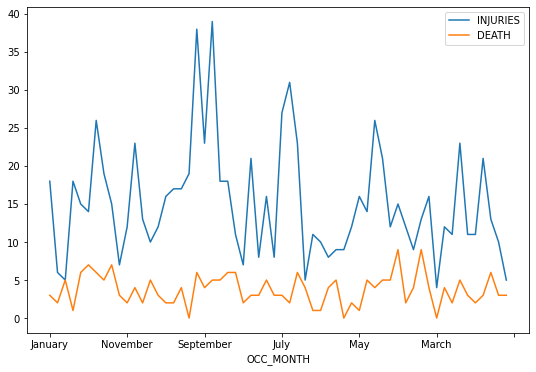

In [25]:
selected_case_by_month = case_by_month_2.loc[case_by_month_2['OCC_YEAR'] >= 2018]
ax = selected_case_by_month.plot(x='OCC_MONTH', y=['INJURIES', 'DEATH'], figsize=(9,6))
#

### Check Case Changes in the Last 10 Years

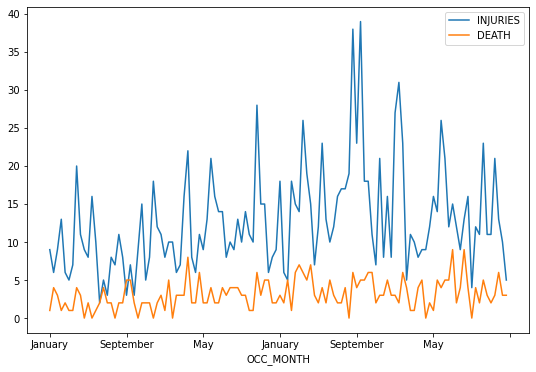

In [26]:
selected_case_by_month = case_by_month_2.loc[case_by_month_2['OCC_YEAR'] >= 2013]
ax = selected_case_by_month.plot(x='OCC_MONTH', y=['INJURIES', 'DEATH'], figsize=(9,6))

### Check Cases by Day of the Week
It shows certain days of the week has more shooting cases

In [27]:
case_by_week = df.loc[:, ['OCC_DOW', 'DEATH', 'INJURIES']]
# Reorgnized data
case_by_week = case_by_week.groupby(by="OCC_DOW")["DEATH","INJURIES"].sum()
case_by_week.reset_index(inplace=True)
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
case_by_week['OCC_DOW'] = pd.Categorical(case_by_week['OCC_DOW'], categories=week_order, ordered=True)
case_by_week = case_by_week.sort_values(by='OCC_DOW')
case_by_week

/var/folders/xj/xxjr_bv52wxd26v9l5j2_9yw0000gn/T/ipykernel_47833/977588208.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  case_by_week = case_by_week.groupby(by="OCC_DOW")["DEATH","INJURIES"].sum()


,OCC_DOW,DEATH,INJURIES
1,Monday,96,405
5,Tuesday,83,341
6,Wednesday,79,318
4,Thursday,70,335
0,Friday,106,376
2,Saturday,113,495
3,Sunday,152,516


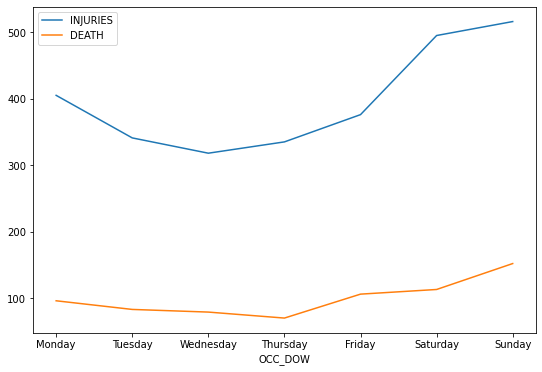

In [28]:
ax = case_by_week.plot(x='OCC_DOW', y=['INJURIES', 'DEATH'], figsize=(9,6))

### Check Cases by Day of the Week
It shows certain hours of the day has more shooting cases

In [29]:
case_by_hour = df.loc[:, ['OCC_HOUR', 'DEATH', 'INJURIES']]
# Reorgnized data
case_by_hour = case_by_hour.groupby(by="OCC_HOUR")["DEATH","INJURIES"].sum()
case_by_hour.reset_index(inplace=True)
case_by_hour = case_by_hour.sort_values(by='OCC_HOUR')
case_by_hour

/var/folders/xj/xxjr_bv52wxd26v9l5j2_9yw0000gn/T/ipykernel_47833/1692136265.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  case_by_hour = case_by_hour.groupby(by="OCC_HOUR")["DEATH","INJURIES"].sum()


,OCC_HOUR,DEATH,INJURIES
0,0,93,382
1,1,40,169
2,2,43,185
3,3,40,177
4,4,18,113
5,5,14,46
6,6,6,34
7,7,4,9
8,8,3,12
9,9,6,24


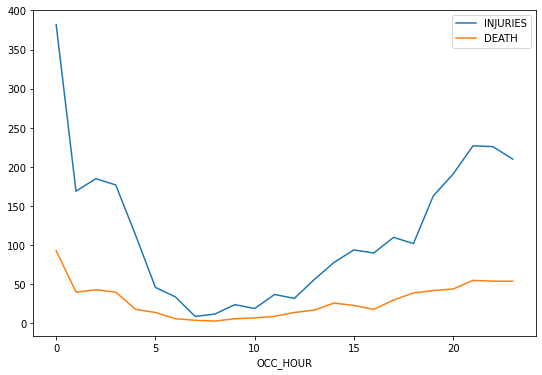

In [30]:
ax = case_by_hour.plot(x='OCC_HOUR', y=['INJURIES', 'DEATH'], figsize=(9,6))

### Check Cases by TIME_RANGE
It shows most of the cases occured at evening and night

In [31]:
case_by_range = df.loc[:, ['OCC_TIME_RANGE', 'DEATH', 'INJURIES']]
# Reorgnized data
case_by_range = case_by_range.groupby(by="OCC_TIME_RANGE")["DEATH","INJURIES"].sum()
case_by_range.reset_index(inplace=True)
time_range_order = ['Morning', 'Afternoon', 'Evening', 'Night']
case_by_range['OCC_TIME_RANGE'] = pd.Categorical(case_by_range['OCC_TIME_RANGE'], categories=time_range_order, ordered=True)
case_by_range = case_by_range.sort_values(by='OCC_TIME_RANGE')
case_by_range

/var/folders/xj/xxjr_bv52wxd26v9l5j2_9yw0000gn/T/ipykernel_47833/3708754972.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  case_by_range = case_by_range.groupby(by="OCC_TIME_RANGE")["DEATH","INJURIES"].sum()


,OCC_TIME_RANGE,DEATH,INJURIES
2,Morning,35,135
0,Afternoon,128,460
1,Evening,288,1119
3,Night,248,1072


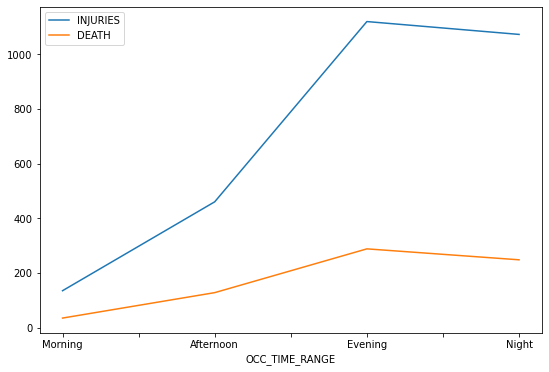

In [32]:
ax = case_by_range.plot(x='OCC_TIME_RANGE', y=['INJURIES', 'DEATH'], figsize=(9,6))

## Analysis from the Original Data

The death and injuries number are correlated to the following factors:
- Neighborhood
- Devision (overlap with devision)
- Month
- Day of the Week
- Hour of the day
- Time range (overlap with Hours)

# PART-2 More Data
Collecting more data that could be consider as an factor impacting the shooting/gunfire cases in the city

## Add more columns to dataframe
- **Population_2021**

    Map 4 on page 35: https://www.toronto.ca/wp-content/uploads/2022/02/92e3-City-Planning-2021-Census-Backgrounder-Population-Dwellings-Backgrounder.pdf

- **One_Parent_Families**

    Map 1 on page 27: https://www.toronto.ca/wp-content/uploads/2022/07/9877-City-Planning-2021-Census-Backgrounder-Families-Hhlds-Marital-Status-Income.pdf
    
- **Part_time_worker_percentage**

    Map 3 on page 12: https://www.toronto.ca/wp-content/uploads/2022/12/93bb-2021-Census-Backgrounder-Education-Labour-Commuting-Language-of-Work.pdf
    (The data prived is a pertage range, then use the mean value as the part time worker percentage)
    
- **Above_Postsecondary_percentage**

    Map 4 on page 13: https://www.toronto.ca/wp-content/uploads/2022/12/93bb-2021-Census-Backgrounder-Education-Labour-Commuting-Language-of-Work.pdf
    
- **Median_household_income**

    Map 4 on page 30: https://www.toronto.ca/wp-content/uploads/2022/07/9877-City-Planning-2021-Census-Backgrounder-Families-Hhlds-Marital-Status-Income.pdf
    
    
## Using the following website to map neighborhood

Find Your Neighbourhood: https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/neighbourhood-profiles/find-your-neighbourhood/#location=&lat=43.698119&lng=-79.377383

## Extra Data

In [5]:
extra_data = r"D:\4.MMAI5000 Artificial Intelligence Fundamentals\project_code\neighbourhood_based_extra_data.csv"
extra_df = pd.read_csv(extra_data)

In [6]:
extra_df.head()

,HOOD_158,NEIGHBOURHOOD_158,POPULATION,ONE_PARENT_FAMILY_RATIO,PART_TIME_WORKER_PERCENTAGE,ABOVE_POSTSECONDARY_PERCENTAGE,MEDIAN_HOUSEHOLD_INCOME
0,1,West Humber-Clairville,33690,658,0.479,0.5980,102500.5
1,2,Mount Olive-Silverstone-Jamestown,31421,658,0.611,0.4355,54350.0
2,3,Thistletown-Beaumond Heights,10005,450,0.479,0.5980,102500.5
3,4,Rexdale-Kipling,10378,200,0.479,0.4355,54350.0
4,5,Elms-Old Rexdale,9366,315,0.430,0.5980,78750.5


In [7]:
selected_source_data = df.loc[:, ['HOOD_158', 'NEIGHBOURHOOD_158', 'DIVISION', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DOW', 'OCC_HOUR', 'OCC_TIME_RANGE', 'DEATH', 'INJURIES']]

In [8]:
selected_source_data.drop(selected_source_data[selected_source_data['HOOD_158'] == 'NSA'].index, inplace=True)
selected_source_data

,HOOD_158,NEIGHBOURHOOD_158,DIVISION,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_HOUR,OCC_TIME_RANGE,DEATH,INJURIES
0,142,Woburn North,D41,2004,May,Saturday,1,Night,0,0
1,1,West Humber-Clairville,D23,2004,July,Monday,23,Evening,0,0
2,24,Black Creek,D31,2004,May,Friday,16,Afternoon,1,1
3,168,Downtown Yonge East,D51,2004,December,Sunday,0,Night,1,0
4,146,Malvern East,D42,2004,April,Monday,22,Evening,0,0
...,...,...,...,...,...,...,...,...,...,...
5702,53,Henry Farm,D33,2022,June,Thursday,3,Night,0,1
5703,164,Wellington Place,D14,2022,July,Sunday,3,Night,1,1
5704,135,Morningside,D43,2022,February,Monday,5,Night,0,0
5705,83,Dufferin Grove,D11,2022,September,Sunday,1,Night,0,2


In [9]:
merged_data = pd.merge(selected_source_data, extra_df, on='NEIGHBOURHOOD_158')
merged_data

,HOOD_158_x,NEIGHBOURHOOD_158,DIVISION,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_HOUR,OCC_TIME_RANGE,DEATH,INJURIES,HOOD_158_y,POPULATION,ONE_PARENT_FAMILY_RATIO,PART_TIME_WORKER_PERCENTAGE,ABOVE_POSTSECONDARY_PERCENTAGE,MEDIAN_HOUSEHOLD_INCOME
0,142,Woburn North,D41,2004,May,Saturday,1,Night,0,0,142,27046,315,0.479,0.6955,78750.5
1,142,Woburn North,D42,2004,January,Thursday,8,Morning,1,0,142,27046,315,0.479,0.6955,78750.5
2,142,Woburn North,D42,2004,March,Wednesday,21,Evening,0,2,142,27046,315,0.479,0.6955,78750.5
3,142,Woburn North,D41,2004,January,Saturday,14,Afternoon,0,0,142,27046,315,0.479,0.6955,78750.5
4,142,Woburn North,D31,2004,March,Saturday,12,Afternoon,0,1,142,27046,315,0.479,0.6955,78750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,101,Forest Hill South,D53,2017,July,Friday,23,Evening,0,0,101,11059,72,0.479,0.8846,232000.5
5639,102,Forest Hill North,D53,2018,November,Thursday,22,Evening,0,0,102,12432,200,0.479,0.7865,102500.5
5640,102,Forest Hill North,D13,2019,January,Sunday,23,Evening,0,0,102,12432,200,0.479,0.7865,102500.5
5641,102,Forest Hill North,D53,2021,September,Tuesday,13,Afternoon,0,1,102,12432,200,0.479,0.7865,102500.5


In [10]:
# Convert 'OCC_TIME_RANGE' column to numerical values using dummy variable
dummy_df = pd.get_dummies(merged_data['OCC_TIME_RANGE'], prefix='OCC_TIME_RANGE')
merged_data = pd.concat([merged_data, dummy_df], axis=1)
merged_data.drop('OCC_TIME_RANGE', axis=1, inplace=True)

In [11]:
# update data

# Define mapping dictionaries
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
    'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10,
    'November': 11, 'December': 12
}

days_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,
    'Saturday': 6, 'Sunday': 7
}

# Convert 'OCC_MONTH' and 'OCC_DOW' columns to numerical values
merged_data['OCC_MONTH'] = merged_data['OCC_MONTH'].map(month_mapping)
merged_data['OCC_DOW'] = merged_data['OCC_DOW'].map(days_mapping)

# Rename column 'HOOD_158_x'
merged_data.rename(columns = {'HOOD_158_x':'HOOD_158'}, inplace = True)
merged_data.drop('HOOD_158_y', axis=1, inplace=True)

merged_data

,HOOD_158,NEIGHBOURHOOD_158,DIVISION,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_HOUR,DEATH,INJURIES,POPULATION,ONE_PARENT_FAMILY_RATIO,PART_TIME_WORKER_PERCENTAGE,ABOVE_POSTSECONDARY_PERCENTAGE,MEDIAN_HOUSEHOLD_INCOME,OCC_TIME_RANGE_Afternoon,OCC_TIME_RANGE_Evening,OCC_TIME_RANGE_Morning,OCC_TIME_RANGE_Night
0,142,Woburn North,D41,2004,5,6,1,0,0,27046,315,0.479,0.6955,78750.5,False,False,False,True
1,142,Woburn North,D42,2004,1,4,8,1,0,27046,315,0.479,0.6955,78750.5,False,False,True,False
2,142,Woburn North,D42,2004,3,3,21,0,2,27046,315,0.479,0.6955,78750.5,False,True,False,False
3,142,Woburn North,D41,2004,1,6,14,0,0,27046,315,0.479,0.6955,78750.5,True,False,False,False
4,142,Woburn North,D31,2004,3,6,12,0,1,27046,315,0.479,0.6955,78750.5,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,101,Forest Hill South,D53,2017,7,5,23,0,0,11059,72,0.479,0.8846,232000.5,False,True,False,False
5639,102,Forest Hill North,D53,2018,11,4,22,0,0,12432,200,0.479,0.7865,102500.5,False,True,False,False
5640,102,Forest Hill North,D13,2019,1,7,23,0,0,12432,200,0.479,0.7865,102500.5,False,True,False,False
5641,102,Forest Hill North,D53,2021,9,2,13,0,1,12432,200,0.479,0.7865,102500.5,True,False,False,False


In [12]:
# Spereate features to numeraical features and categorical features
numerical_features = ['POPULATION', 'ONE-PARENT-FAMILY-RATIO', 'PART-TIME-WORKER-PERCENTAGE', 'ABOVE-POSTSECONDARY-PERCENTAGE', 'MEDIAN-HOUSEHOLD-INCOME']
categorical_features = ['OCC_MONTH', 'OCC_DOW', 'OCC_HOUR', 'OCC_TIME_RANGE', 'DIVISION']

### Regression

Regression algorithms are used when you want to predict a continuous numerical output.

In this case, we need to check if regression model fits our data

In [13]:
from statsmodels.formula.api import ols

In [14]:
regression_anlysis = ols("DEATH ~ OCC_MONTH + OCC_DOW + OCC_HOUR + OCC_TIME_RANGE_Night + OCC_TIME_RANGE_Evening + OCC_TIME_RANGE_Afternoon + OCC_TIME_RANGE_Morning + DIVISION + NEIGHBOURHOOD_158", data=merged_data).fit()
# regression_anlysis = ols("INJURIES ~ OCC_MONTH + OCC_DOW + OCC_HOUR + OCC_TIME_RANGE + DIVISION + NEIGHBOURHOOD_158", data=merged_data).fit()
print(regression_anlysis.summary())

                            OLS Regression Results                            
Dep. Variable:                  DEATH   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.650
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.87e-07
Time:                        21:10:21   Log-Likelihood:                -1940.0
No. Observations:                5643   AIC:                             4240.
Df Residuals:                    5463   BIC:                             5435.
Df Model:                         179                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

# NOTE
From here you can apply the cluster models you learned from the class to get some results.

### Check Logistic Regression

In [15]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
def conv(x):
    if x==0:
        return 0
    else:
        return 1

merged_data['DEATH'] = merged_data['DEATH'].apply(conv)
merged_data['INJURIES'] = merged_data['INJURIES'].apply(conv)
#converted target variables to binary

In [31]:
X = merged_data[['HOOD_158', 'OCC_MONTH', 'OCC_DOW', 'OCC_HOUR', 'OCC_TIME_RANGE_Afternoon', 'OCC_TIME_RANGE_Evening', 'OCC_TIME_RANGE_Morning', 'OCC_TIME_RANGE_Night', 'POPULATION', 'ONE_PARENT_FAMILY_RATIO',
       'PART_TIME_WORKER_PERCENTAGE', 'ABOVE_POSTSECONDARY_PERCENTAGE', 'MEDIAN_HOUSEHOLD_INCOME']]
y = merged_data[['INJURIES']]

In [32]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the Data
X_scaled = normalize(X_scaled)

In [33]:
X_train, X_test,y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

In [34]:
# LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
# Prediction
y_pred = lg.predict(X_test)
 
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 61.293179805137285


C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
X = merged_data[['HOOD_158','OCC_MONTH', 'OCC_DOW', 'OCC_HOUR', 'OCC_TIME_RANGE_Afternoon', 'OCC_TIME_RANGE_Evening', 'OCC_TIME_RANGE_Night', 'POPULATION', 'ONE_PARENT_FAMILY_RATIO',
       'PART_TIME_WORKER_PERCENTAGE', 'ABOVE_POSTSECONDARY_PERCENTAGE', 'MEDIAN_HOUSEHOLD_INCOME']]
y = merged_data[['DEATH']]

In [36]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the Data
X_scaled = normalize(X_scaled)

In [37]:
X_train, X_test,y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

In [38]:
# LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
# Prediction
y_pred = lg.predict(X_test)
 
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 87.59964570416298


C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
